# Credit Score and Approval Status Prediction 

The goal of this project is to use regression for predicting the credit score and classification for the apporval status prediction
Group Members : <br> Zihua Lai (437849)          Zeping Chen (476917)

The dataset used for this project is the Loan Approval Classification Dataset from kaggle https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data?resource=download

In [161]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.utils import resample
from sklearn.preprocessing import RobustScaler

%matplotlib inline

In [162]:
#load data 
path_to_dataset = "data/loan_data.csv"
df = pd.read_csv(path_to_dataset)
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


## Variable Description

person_age Applicant's age Float; <br>
person_gender Applicant's gender Categorical; <br>
person_education Applicant's highest level of education; <br>
Categorical person_income Applicant's annual income in currency Float; <br>
person_emp_exp Years of employment experience Integer; <br>
person_home_ownership Home ownership status (e.g., rent, own, mortgage) Categorical; <br>
loan_amnt Amount of loan requested Float; <br>
loan_intent Intended purpose of the loan (e.g., personal, education) Categorical; <br>
loan_int_rate Interest rate applicable to the loan Float; <br>
loan_percent_income Loan amount as a percentage of annual income Float; <br>
cb_person_cred_hist_length Number of years of credit history Float; <br>
credit_score Applicant's credit score Integer; <br>
previous_loan_defaults_on_file Indicator of previous loan defaults (Yes/No) Categorical; <br>
loan_status Loan status outcome (1 = approved, 0 = rejected) Integer <br>

In [163]:
#number of rows and columns
df.shape 

(45000, 14)

In [164]:
#check number of na values
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [165]:
#check if there is any duplication
df.duplicated().sum() 

np.int64(0)

In [166]:
#check the statistical info 
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## Explainatory Data Analysis

First let's take a look at the distribution of the target variable

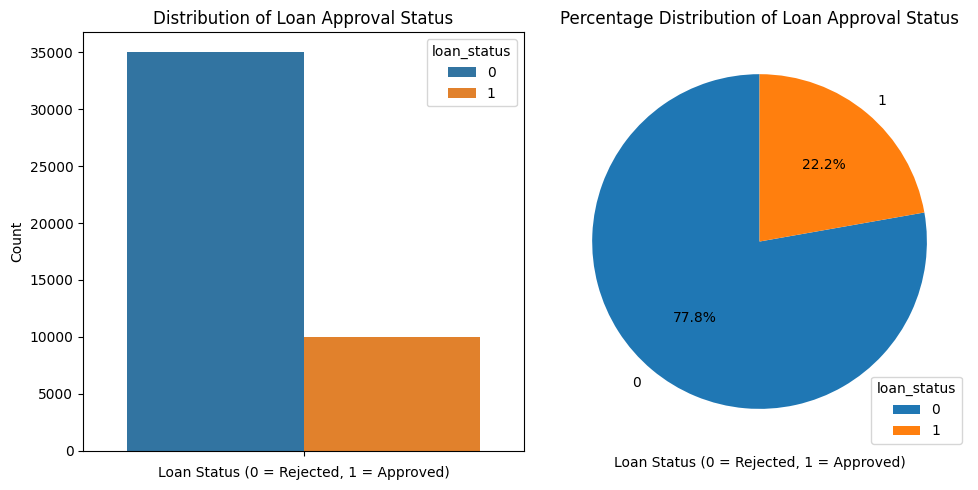

In [167]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
loan_status_counts = df['loan_status'].value_counts()

sns.barplot(y=df['loan_status'].value_counts(), hue=df['loan_status'].value_counts().index, ax=axes[0], palette="tab10")
axes[0].set_title('Distribution of Loan Approval Status')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Loan Status (0 = Rejected, 1 = Approved)')

axes[1].pie(
    df['loan_status'].value_counts(),
    labels=df['loan_status'].value_counts().index,
    autopct='%1.1f%%', 
    startangle=90,
    colors=sns.color_palette('tab10')
)
axes[1].legend(
    df['loan_status'].value_counts().index,
    title="loan_status",
    loc="lower right",
)
axes[1].set_title('Percentage Distribution of Loan Approval Status')
axes[1].set_xlabel('Loan Status (0 = Rejected, 1 = Approved)')

plt.tight_layout()
plt.show()

The insights from the loan status distribution visualization:

The count annotations on top of each bar provide a clear view of the actual number of records in each category, highlighting any imbalance in the dataset.
This visualization suggests a higher count of rejected loans compared to approved ones, which may indicate a class imbalance that should be addressed when building predictive models.
The pie chart illustrates the percentage distribution of loan approval status, offering a complementary view of the relative proportions of approvals and rejections.

### Univariate Analysis for Numerical Vars  -- Histogram

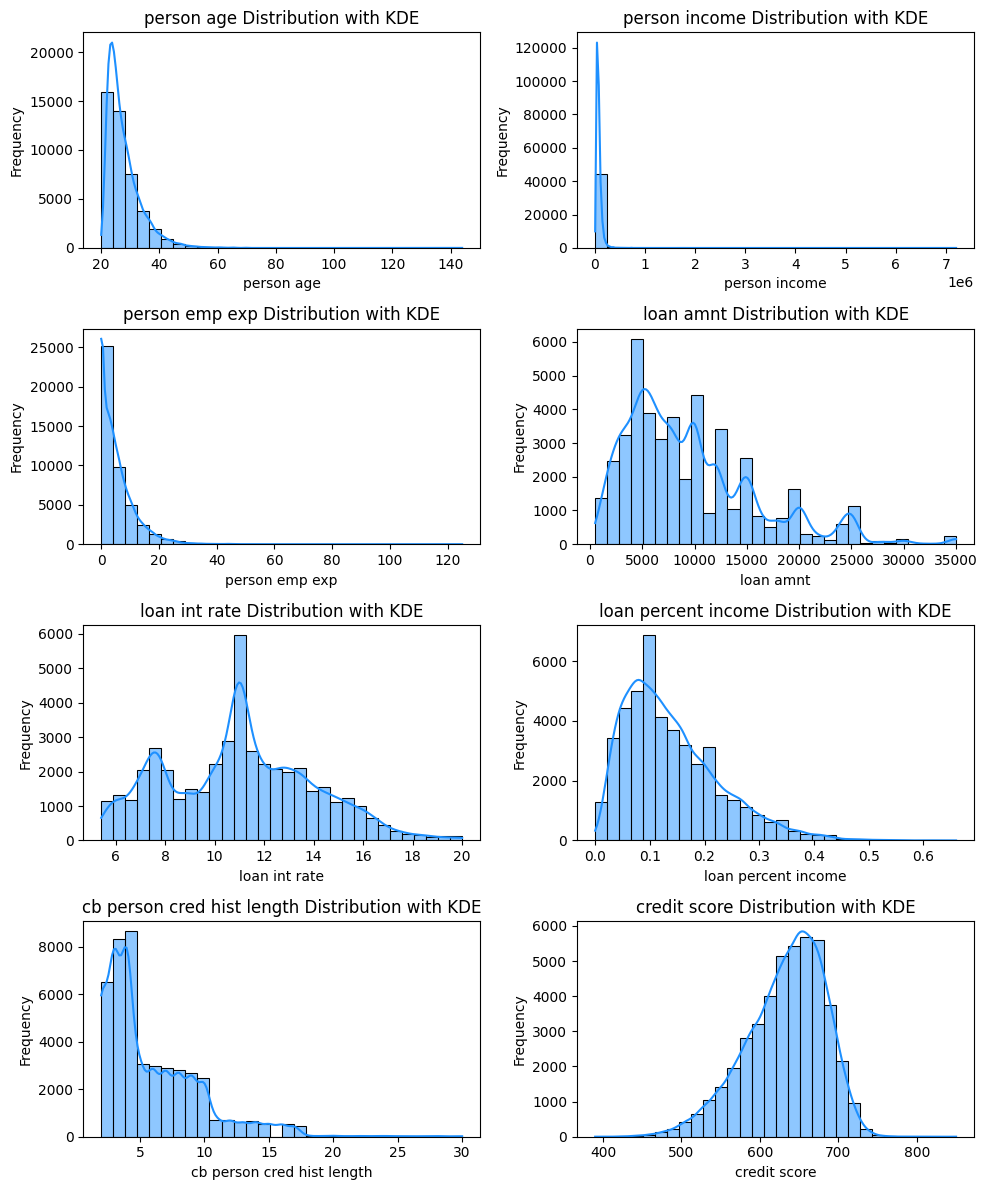

In [168]:
#perform univariate analysis for numerical columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(10, 12))  
    
    for i, column in enumerate(columns, 1):
        plt.subplot(4, 2, i)  
        sns.histplot(data[column], kde=True, bins=30, color='dodgerblue')
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
univariate_analysis(df, numerical_columns)

### Univariate Analysis for Numerical Vars -- Box Plot  

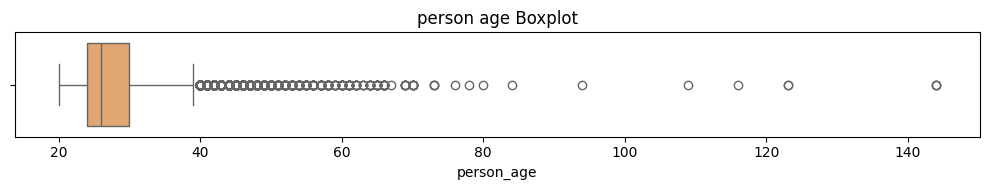


Summary Statistics for person age:
 count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64


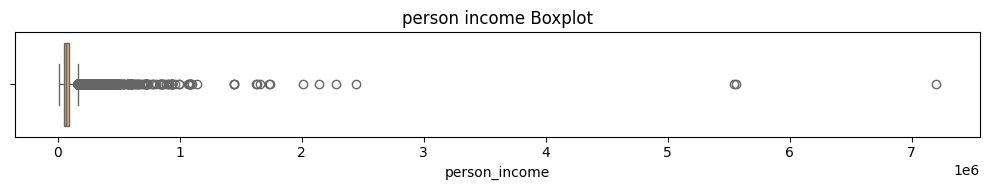


Summary Statistics for person income:
 count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64


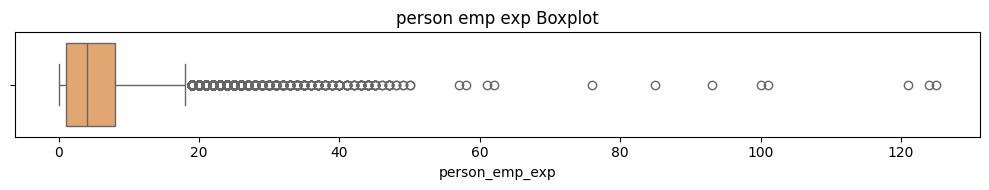


Summary Statistics for person emp exp:
 count    45000.000000
mean         5.410333
std          6.063532
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64


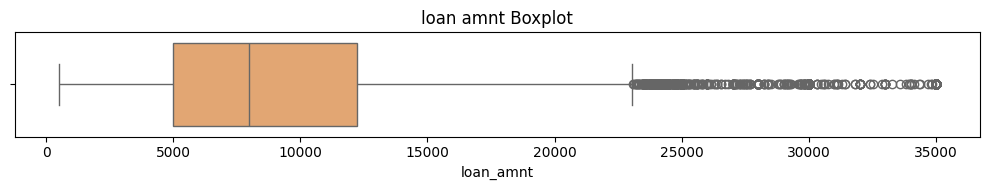


Summary Statistics for loan amnt:
 count    45000.000000
mean      9583.157556
std       6314.886691
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64


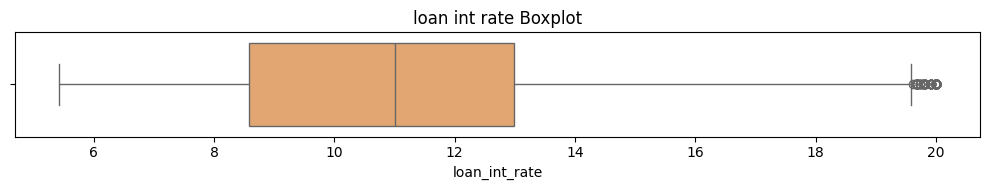


Summary Statistics for loan int rate:
 count    45000.000000
mean        11.006606
std          2.978808
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64


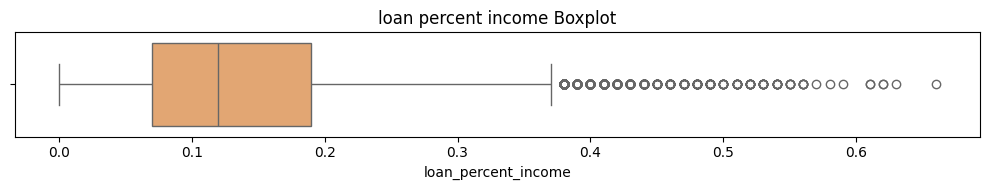


Summary Statistics for loan percent income:
 count    45000.000000
mean         0.139725
std          0.087212
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64


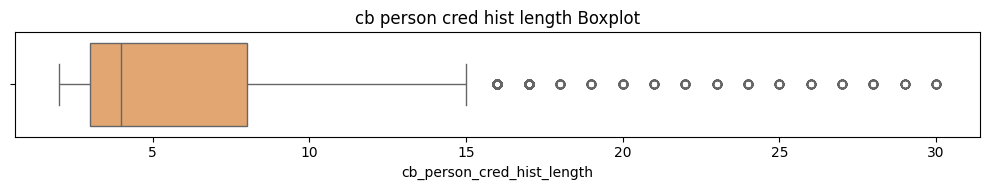


Summary Statistics for cb person cred hist length:
 count    45000.000000
mean         5.867489
std          3.879702
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64


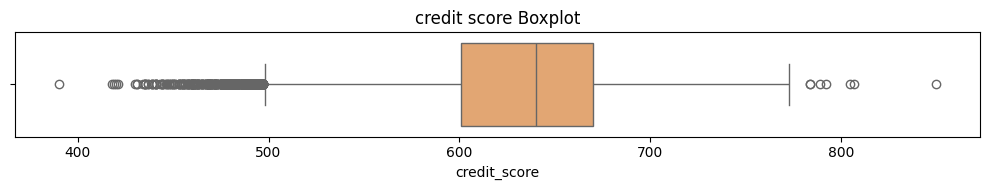


Summary Statistics for credit score:
 count    45000.000000
mean       632.608756
std         50.435865
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        850.000000
Name: credit_score, dtype: float64


In [169]:
#box plot for more details
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    sns.boxplot(x=data[column], color='sandybrown')
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

for column in numerical_columns:
    univariate_analysis(df, column, column.replace('_', ' '))

Person Age: <br>

Ages range from 20 to 144, with the median age at 26. The high maximum value suggests a few outliers.
The interquartile range (IQR) is fairly narrow, with most values between 24 and 30. <br>

Person Income: <br>

The income distribution has a significant range, from 8,000 to over 7.2 million, with a median around 67,048.
The high maximum value indicates extreme outliers, which could potentially skew analyses and models. <br>

Person Employment Experience: <br>

Most values fall below 10 years, with the median at 4 years.
A maximum of 125 years is unusual, indicating outliers or data anomalies. <br>

Loan Amount: <br>

Loan amounts vary from 500 to 35,000, with a median of 8,000.
The distribution suggests a broad spread, with some applicants requesting higher amounts near the upper limit. <br>

Loan Interest Rate: <br>

Interest rates range from 5.42% to 20%, with a median rate of 11.01%.
Most rates cluster within the IQR (8.59% to 12.99%), which is typical for loan interest rates. <br>

Loan Percent Income: <br>

This metric ranges from 0 to 0.66, with a median of 0.12, suggesting that most loans are less than 20% of the borrower’s income.
The presence of high values near 0.66 may indicate loans that represent a higher financial burden for some applicants. <br>

Credit History Length: <br>

Credit history spans from 2 to 30 years, with a median of 4 years.
Most applicants have shorter credit histories, likely reflecting a younger demographic. <br>

Credit Score: <br>

Credit scores range from 390 to 850, with a median of 640.
The distribution appears fairly symmetric around the mean of 632, with most values falling within columns or address any anomalies. <br>

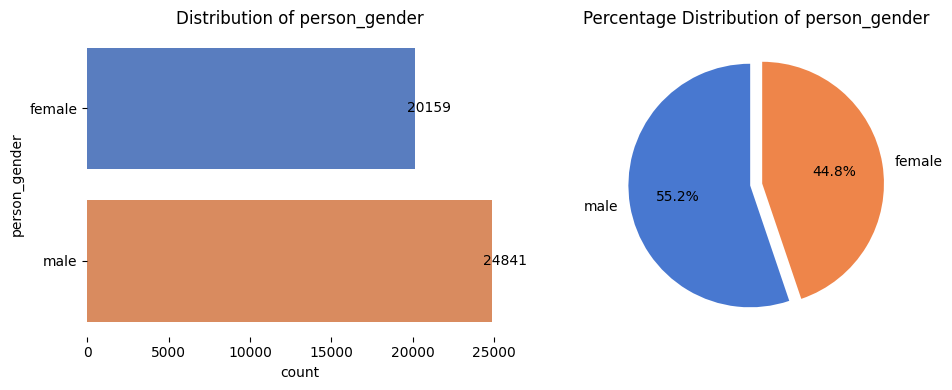

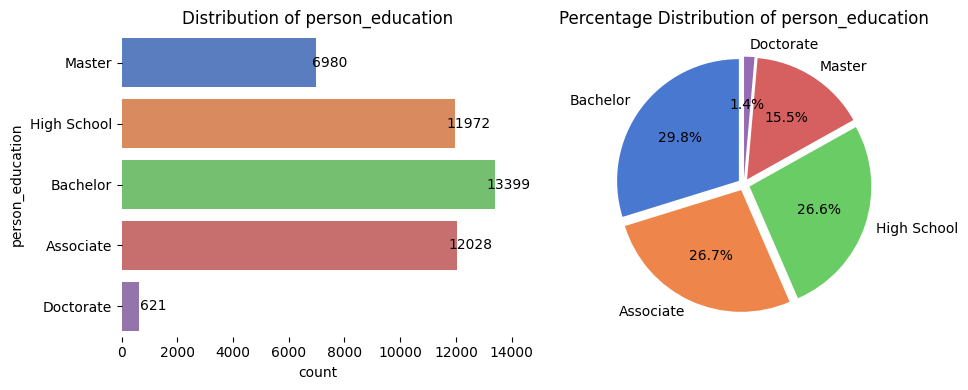

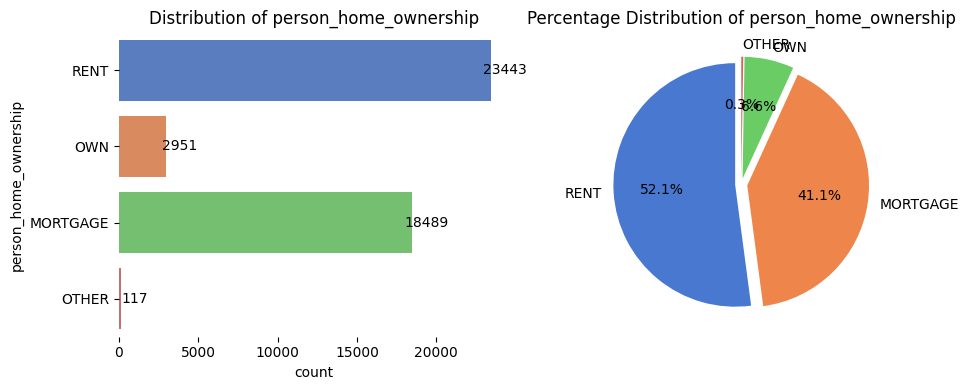

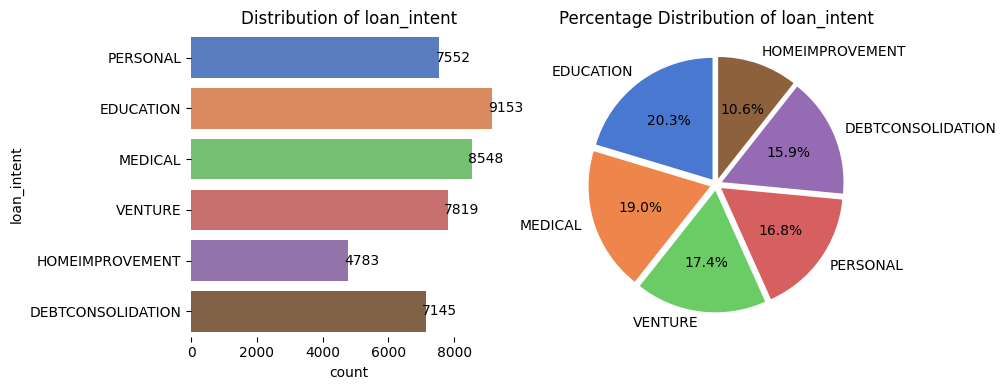

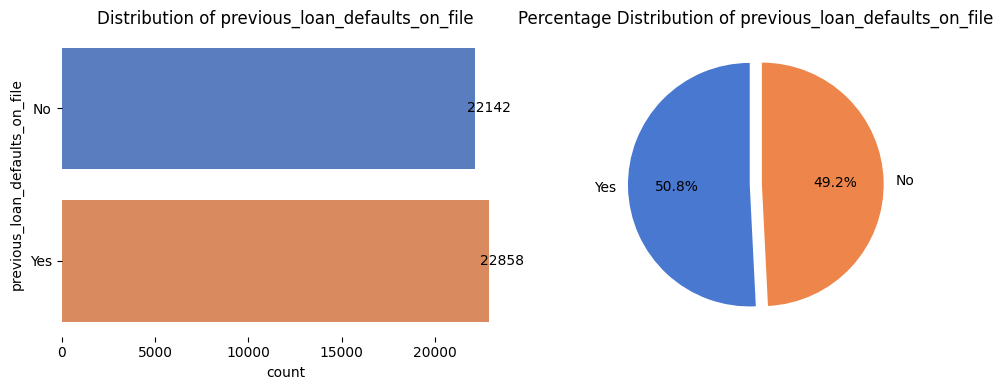

In [170]:
#perform univariate analysis for categorical columns
def plot_categorical_distribution(column_name, data=df):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=df, hue=column_name, palette='muted')  
    plt.title(f'Distribution of {column_name}')
     
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    
    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()

categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
for i in range(len(categorical_columns)):
    plot_categorical_distribution(categorical_columns[i])

Insights based on the categorical distributions: <br>

Person Gender: <br>

The dataset is relatively balanced in terms of gender, though there might be a slight skew toward one gender, depending on the counts.
The pie chart offers a visual summary of the proportion of each gender in the dataset. <br>

Person Education: <br>

Most applicants have a high school, bachelor’s, or master’s education, with fewer holding an associate or doctorate degree.
The education distribution could influence loan approval patterns, as education level often correlates with income and creditworthiness. <br> 

Person Home Ownership: <br>

The majority of applicants either rent or own homes, with a smaller number having mortgages or classified under "other."
Applicants with different homeownership statuses may have varying financial stability, impacting their credit risk. <br>

Loan Intent: <br>

Loan purposes are diverse, with common intents like personal use, debt consolidation, medical expenses, and education.
The distribution reveals common reasons for seeking loans, which may impact loan approval criteria depending on risk. <br>

Previous Loan Defaults on File: <br>

Most applicants have no record of previous loan defaults, though there is a significant portion with defaults.
This feature can strongly influence loan decisions, as past defaults indicate higher risk.

## Outlier Removal

Now we will remove the outliers in our data, based on the analysis we performed above

In [171]:
#remove records having age >= 100
df = df[df['person_age'] < 100]

#remove records having employment experience >= 80
df = df[df['person_emp_exp'] < 80]

## Multivariate Analysis

Next we will check the pairplot of our variables to see if there are any correlations between our variables.

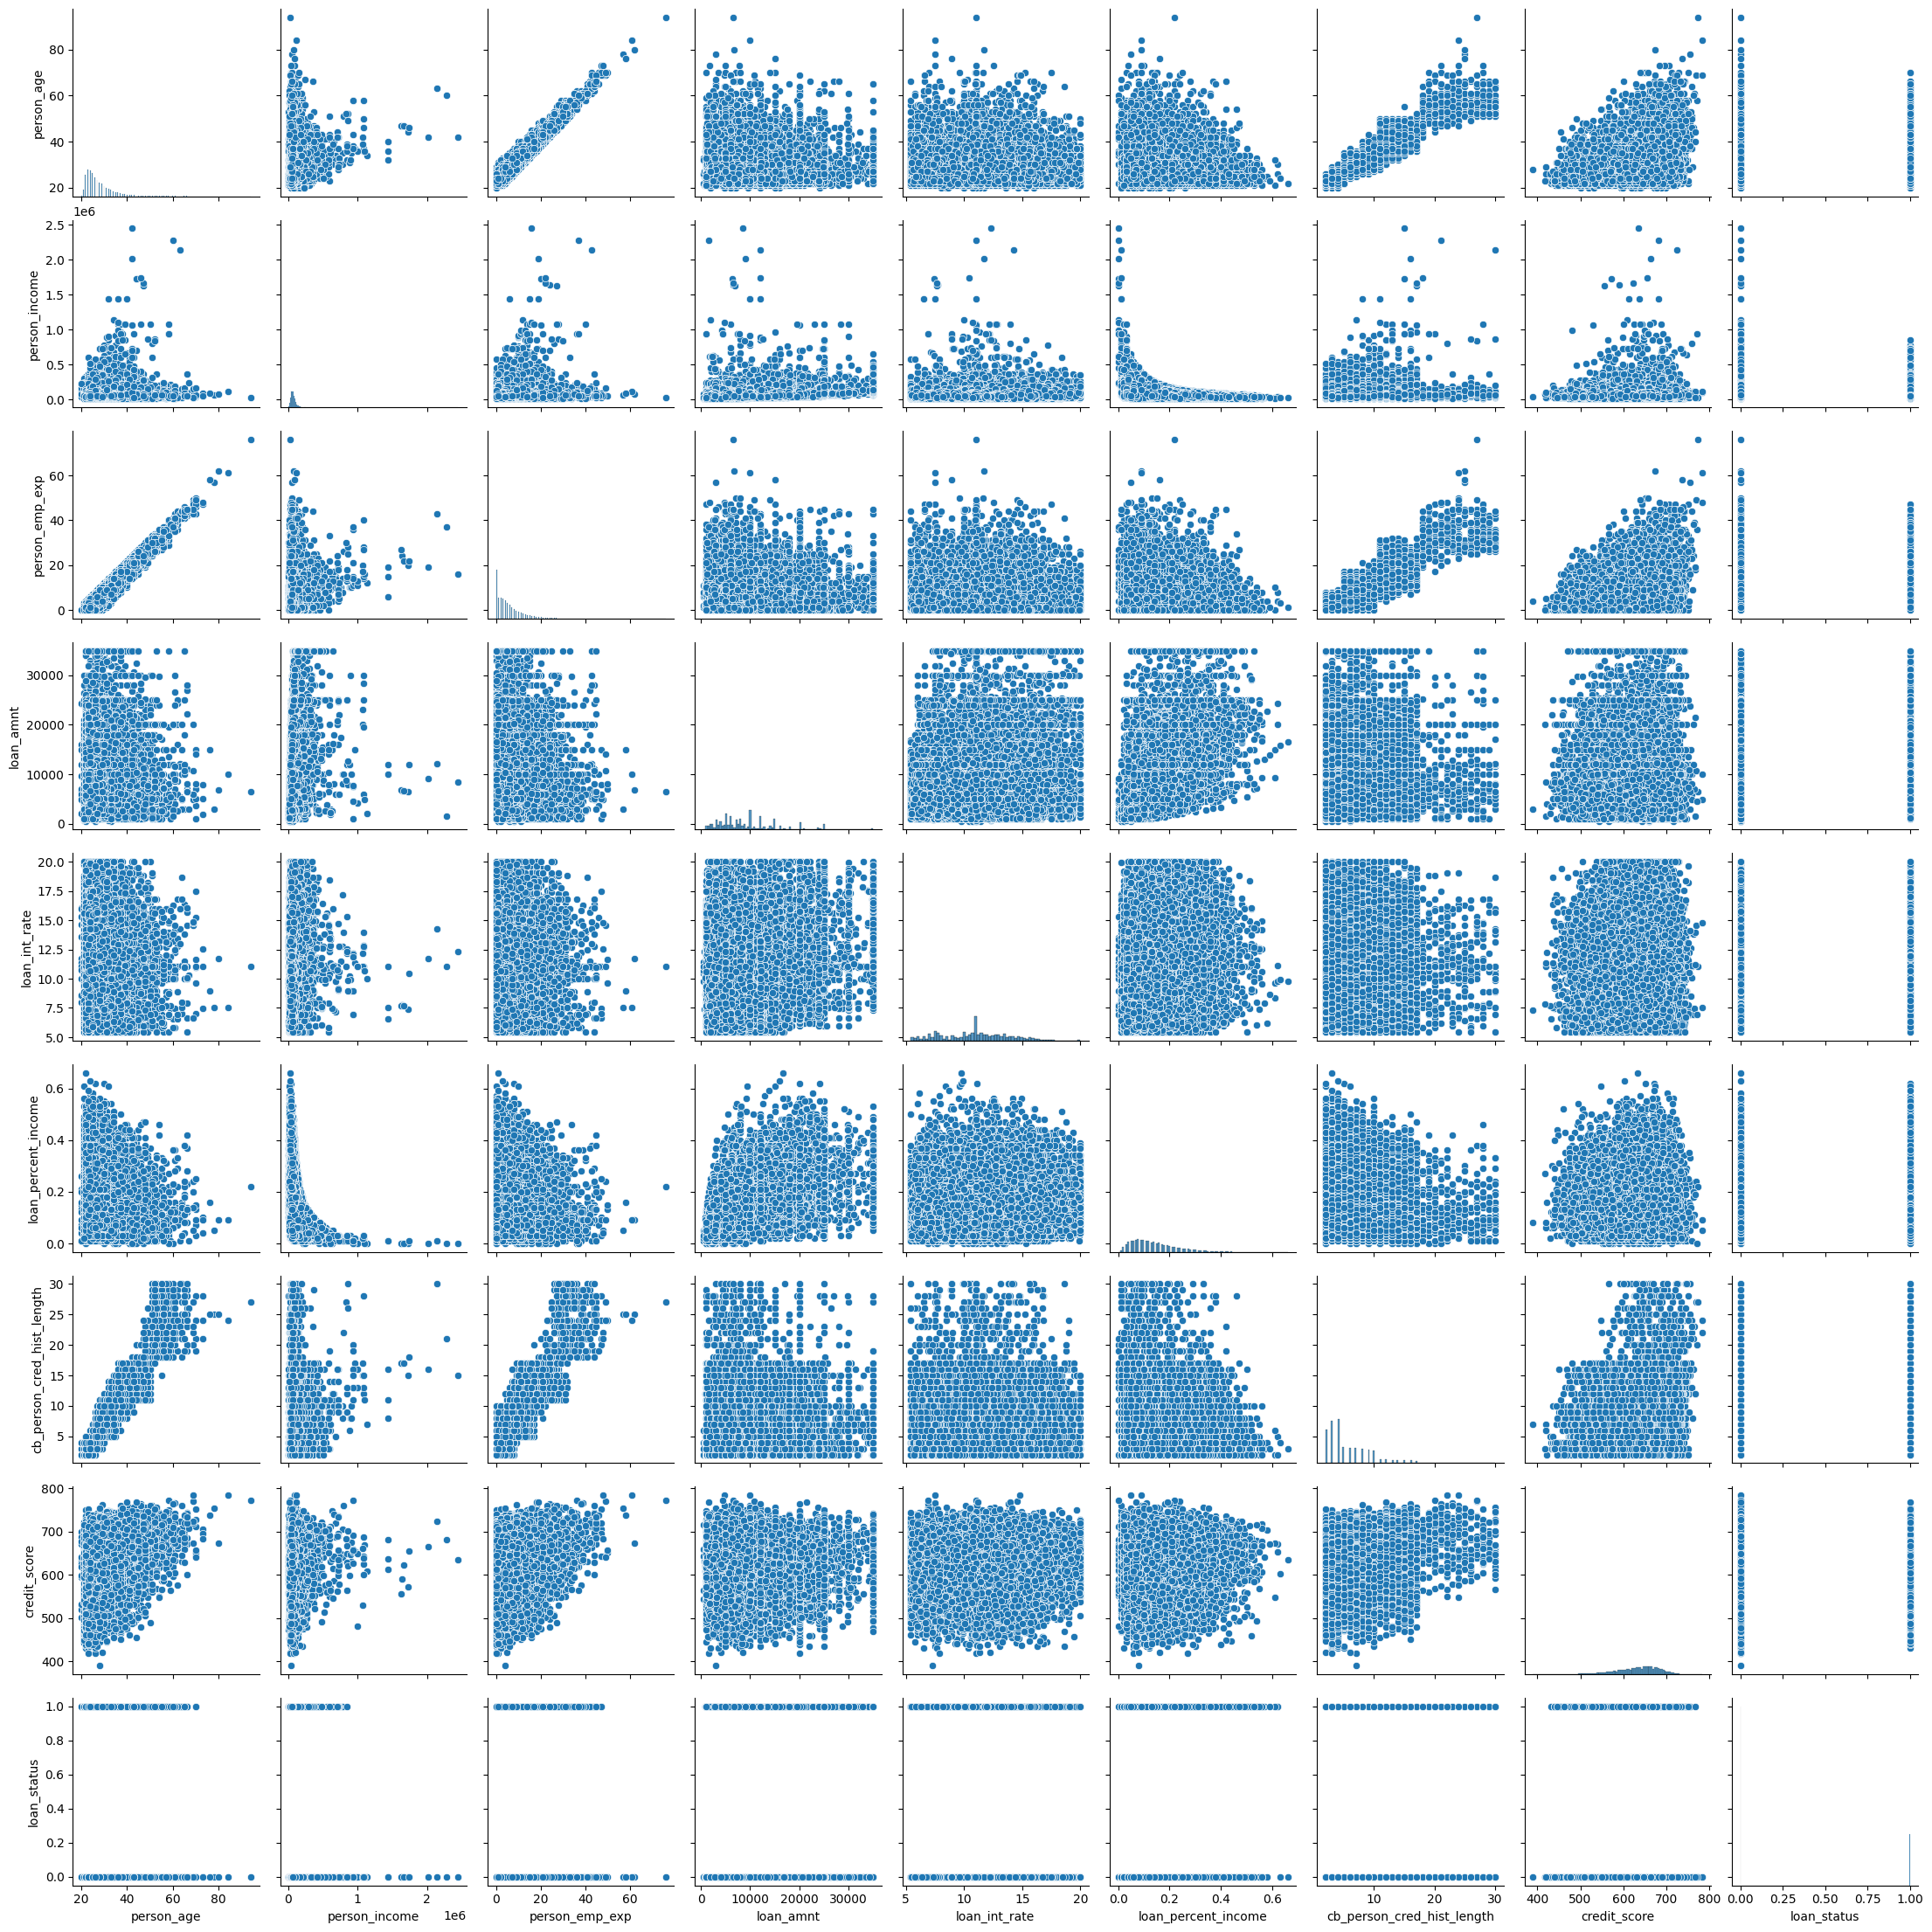

In [172]:
sns.pairplot(df)

From the pairplot, it can be observed that there is a strong positive correlation between person_age and person_emp_exp, which is understandable. Employment experience usually increases as the person grows older. Likewise, a correlation between person_age and person_cred_hist_length can be observed.

We will now quantify these correlations so that we can see how strong they are actually correlated.

                            person_age  person_income  person_emp_exp  \
person_age                    1.000000       0.144634        0.952294   
person_income                 0.144634       1.000000        0.134666   
person_emp_exp                0.952294       0.134666        1.000000   
loan_amnt                     0.052080       0.312441        0.045792   
loan_int_rate                 0.012757      -0.001361        0.016055   
loan_percent_income          -0.041955      -0.287149       -0.038434   
cb_person_cred_hist_length    0.878659       0.128832        0.840146   
credit_score                  0.174648       0.025462        0.182592   

                            loan_amnt  loan_int_rate  loan_percent_income  \
person_age                   0.052080       0.012757            -0.041955   
person_income                0.312441      -0.001361            -0.287149   
person_emp_exp               0.045792       0.016055            -0.038434   
loan_amnt                    1.000

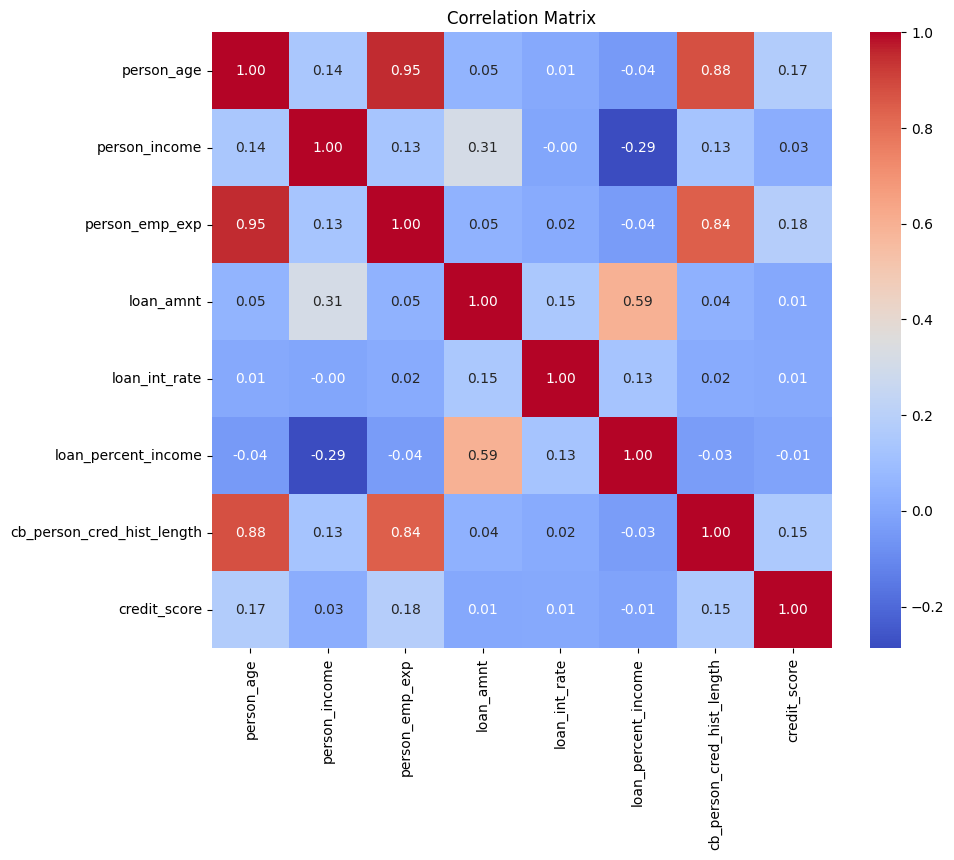

In [173]:
corr = df[numerical_columns].corr()
print(corr)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

From the heatmap it can be seen clearly that there are strong positive correlations between person_age, person_emp_exp and person_cred_hist_length